In [7]:
# import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in Data


In [8]:
df = pd.read_csv('data/crime.csv',encoding='ISO-8859-1')

df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


## Taking a look at our data.

In [9]:
print(df.info())
print(' ')
print(df.describe())
print(' ')
print(df.shape)
print(' ')
print(df.columns)
print(' ')
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
INCIDENT_NUMBER        319073 non-null object
OFFENSE_CODE           319073 non-null int64
OFFENSE_CODE_GROUP     319073 non-null object
OFFENSE_DESCRIPTION    319073 non-null object
DISTRICT               317308 non-null object
REPORTING_AREA         319073 non-null object
SHOOTING               1019 non-null object
OCCURRED_ON_DATE       319073 non-null object
YEAR                   319073 non-null int64
MONTH                  319073 non-null int64
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
UCR_PART               318983 non-null object
STREET                 308202 non-null object
Lat                    299074 non-null float64
Long                   299074 non-null float64
Location               319073 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 41.4+ MB
None
 
        OFFENSE_CODE           YEAR     

#### Lets take a look at any missing data
From the heatmap below we can see that the shooting column contains mostly NaN values. Not sure if these NaN values mean there was not a shooting or is it just missing information?

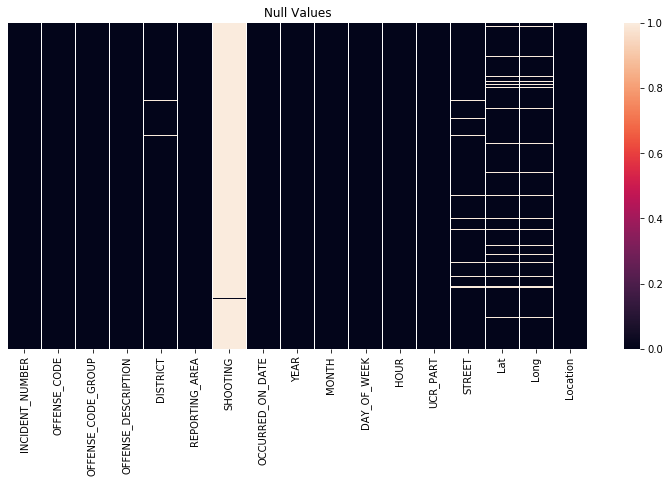

In [10]:
figure = plt.figure(figsize=(13,6))
sns.heatmap(df.isnull(),yticklabels='')
plt.title('Null Values')

plt.savefig('images/nullValueHeatMap.png',bbox_inches = 'tight')

In [11]:
# DROP NULL VALUES ??????

### Overview of Offenses

#### Top ten Offenses

In [12]:
# create DF of unique offense and how many times they occured. 
offenseCounts = pd.DataFrame(df['OFFENSE_CODE_GROUP'].value_counts()).reset_index()
# rename columns
offenseCounts.rename(columns={'index':'Offense','OFFENSE_CODE_GROUP':'Count'}, inplace=True)
offenseCounts.head(10)

,Offense,Count
0,Motor Vehicle Accident Response,37132
1,Larceny,25935
2,Medical Assistance,23540
3,Investigate Person,18750
4,Other,18075
5,Drug Violation,16548
6,Simple Assault,15826
7,Vandalism,15415
8,Verbal Disputes,13099
9,Towed,11287


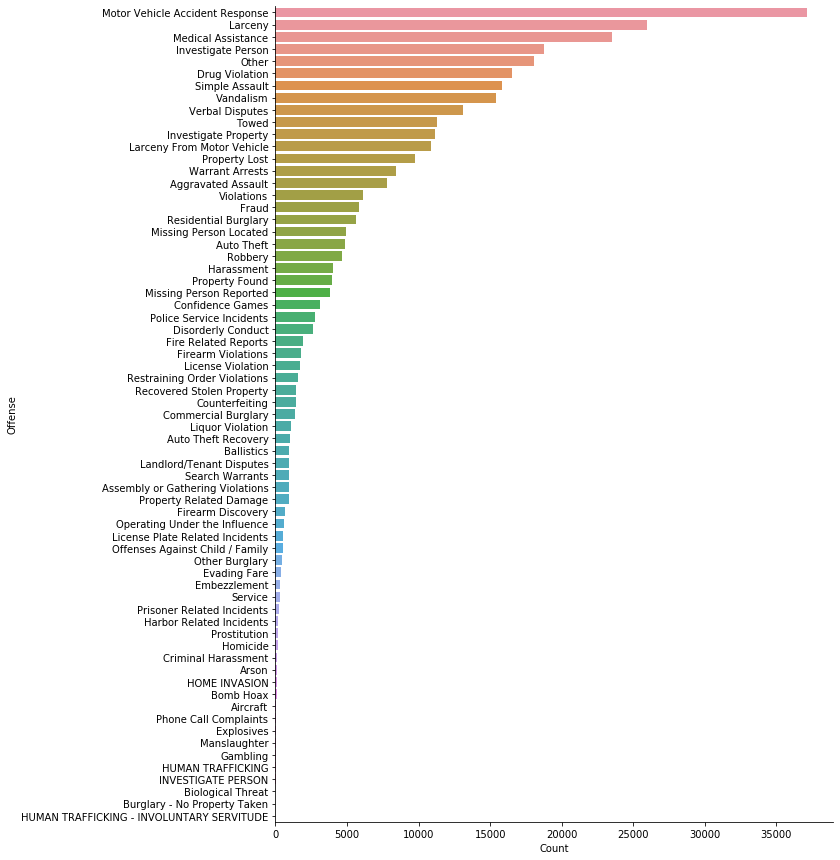

In [18]:
figure = plt.figure(figsize=(10,15))
sns.barplot(x=offenseCounts['Count'],y=offenseCounts['Offense'],)
plt.ylabel('Offense')
plt.xlabel('Count')
sns.despine()
plt.savefig('images/offenseCount.png',bbox_inches = 'tight')

### Are certain areas more  susceptible to crime?

In [14]:
crimeAreas = pd.DataFrame(df['STREET'].value_counts()).reset_index()
crimeAreas.rename(columns={'index':'Street','STREET':'Count'},inplace=True)
crimeAreas.head(10)

,Street,Count
0,WASHINGTON ST,14194
1,BLUE HILL AVE,7794
2,BOYLSTON ST,7221
3,DORCHESTER AVE,5149
4,TREMONT ST,4796
5,MASSACHUSETTS AVE,4708
6,HARRISON AVE,4609
7,CENTRE ST,4383
8,COMMONWEALTH AVE,4134
9,HYDE PARK AVE,3470


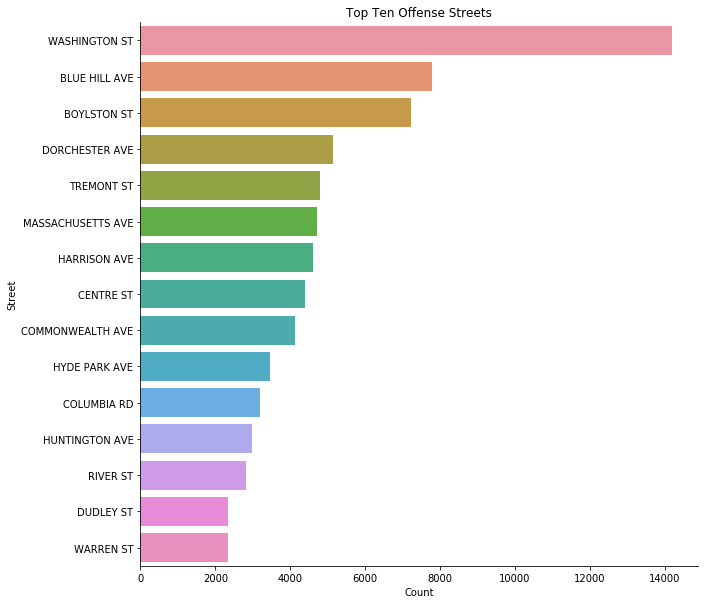

In [97]:
figure = plt.figure(figsize=(10,10))

sns.barplot(x=crimeAreas['Count'].iloc[:15],y=crimeAreas['Street'].iloc[:15])
plt.ylabel('Street')
plt.xlabel('Count')
plt.title('Top Ten Offense Streets')
sns.despine()
plt.savefig('images/streetsOffenseCount.png',bbox_inches = 'tight')

### Which districts have the highest rate of offenses?

In [24]:
districtCrimeRate = pd.DataFrame(df['DISTRICT'].value_counts()).reset_index()
districtCrimeRate.rename(columns={'index':'District','DISTRICT':'Count'},inplace=True)
districtCrimeRate.head(10)

,District,Count
0,B2,49945
1,C11,42530
2,D4,41915
3,A1,35717
4,B3,35442
5,C6,23460
6,D14,20127
7,E13,17536
8,E18,17348
9,A7,13544


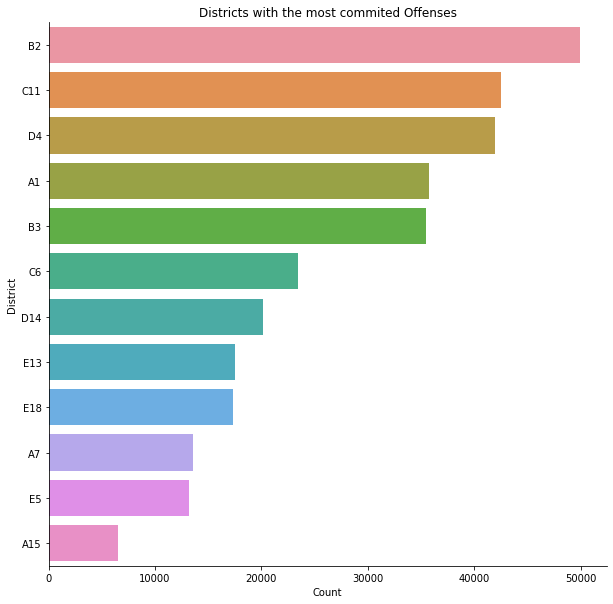

In [184]:
figure = plt.figure(figsize=(10,10))

sns.barplot(x=districtCrimeRate['Count'].iloc[:15],y=districtCrimeRate['District'].iloc[:15])
plt.ylabel('District')
plt.xlabel('Count')
plt.title('Districts with the most commited Offenses')
sns.despine()
plt.savefig('images/districtOffenseCount.png',bbox_inches = 'tight')

### Offenses by District

In [276]:
offenseByDistrict = pd.DataFrame(df.groupby(['DISTRICT','OFFENSE_CODE_GROUP'])['OFFENSE_CODE_GROUP'].count())

offenseByDistrict.rename(columns={'OFFENSE_CODE_GROUP':'Count'},inplace=True)

# offenseByDistrict.reset_index(inplace=True)

offenseByDistrict.sort_values(['DISTRICT','Count'],ascending=False,inplace=True)

offenseByDistrict.head()

Count
DISTRICT OFFENSE_CODE_GROUP                    
E5       Motor Vehicle Accident Response   1813
         Medical Assistance                1509
         Investigate Person                1059
         Other                              804
         Drug Violation                     705

### Offenses by District according to Overall Top Ten Offenses

In [279]:
# grab list of top ten offense from offenseCounts table
topTenOffensesList = (offenseCounts['Offense'].loc[:10]).tolist()
print(topTenOffensesList)

# reset index of offenseByDistrict Table 
offenseByDistrictPlot = offenseByDistrict.reset_index()
# filter table by top ten offenses
offenseByDistrictPlot = pd.DataFrame(offenseByDistrictPlot[offenseByDistrictPlot['OFFENSE_CODE_GROUP'].isin(topTenOffensesList)])

offenseByDistrictPlot.head()

['Motor Vehicle Accident Response', 'Larceny', 'Medical Assistance', 'Investigate Person', 'Other', 'Drug Violation', 'Simple Assault', 'Vandalism', 'Verbal Disputes', 'Towed', 'Investigate Property']


,DISTRICT,OFFENSE_CODE_GROUP,Count
0,E5,Motor Vehicle Accident Response,1813
1,E5,Medical Assistance,1509
2,E5,Investigate Person,1059
3,E5,Other,804
4,E5,Drug Violation,705


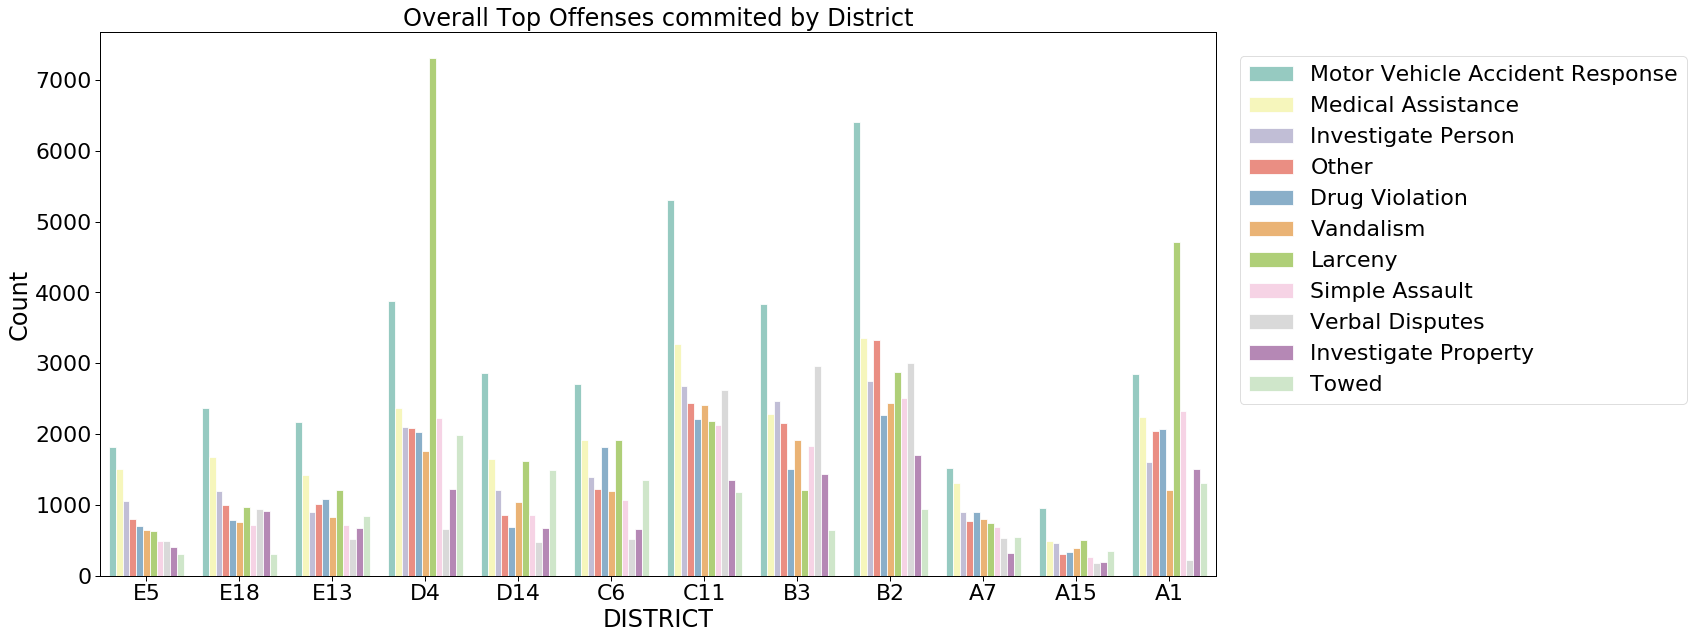

In [293]:
sns.set_context('paper',font_scale=2.5)
figure = plt.figure(figsize=(20,10))

sns.barplot(x=offenseByDistrictPlot['DISTRICT'],y=offenseByDistrictPlot['Count'],
            hue=offenseByDistrictPlot['OFFENSE_CODE_GROUP'],palette='Set3',edgecolor='white')
plt.legend(bbox_to_anchor=(1,1), loc='best', borderaxespad=1.1)
plt.title('Overall Top Offenses commited by District')
# plt.ylabel('Count',{'fontsize':22})
# plt.xlabel('District',{'fontsize':22})

plt.savefig('images/offensesByDistrict.png',bbox_inches = 'tight')

### Heatmap of Offenses by District

In [318]:
offenseHeatDf = offenseByDistrictPlot.pivot(index='OFFENSE_CODE_GROUP',columns='DISTRICT',values='Count')
offenseHeatDf

DISTRICT,A1,A15,A7,B2,B3,C11,C6,D14,D4,E13,E18,E5
OFFENSE_CODE_GROUP,,,,,,,,,,,,
Drug Violation,2076,327,901,2269,1508,2209,1809,691,2027,1083,780,705
Investigate Person,1609,464,890,2747,2459,2681,1385,1208,2091,891,1193,1059
Investigate Property,1499,195,313,1703,1431,1356,657,670,1226,667,913,409
Larceny,4704,502,744,2871,1212,2183,1910,1620,7313,1203,968,631
Medical Assistance,2243,483,1301,3353,2283,3274,1915,1641,2368,1425,1680,1509
Motor Vehicle Accident Response,2847,960,1516,6407,3836,5305,2699,2857,3882,2166,2366,1813
Other,2047,301,771,3325,2151,2436,1220,853,2089,1004,991,804
Simple Assault,2320,258,684,2510,1830,2125,1067,850,2218,718,711,491
Towed,1313,343,550,946,640,1173,1351,1487,1982,838,303,298


Text(0.5, 1, 'Heatmap of Offense by District')

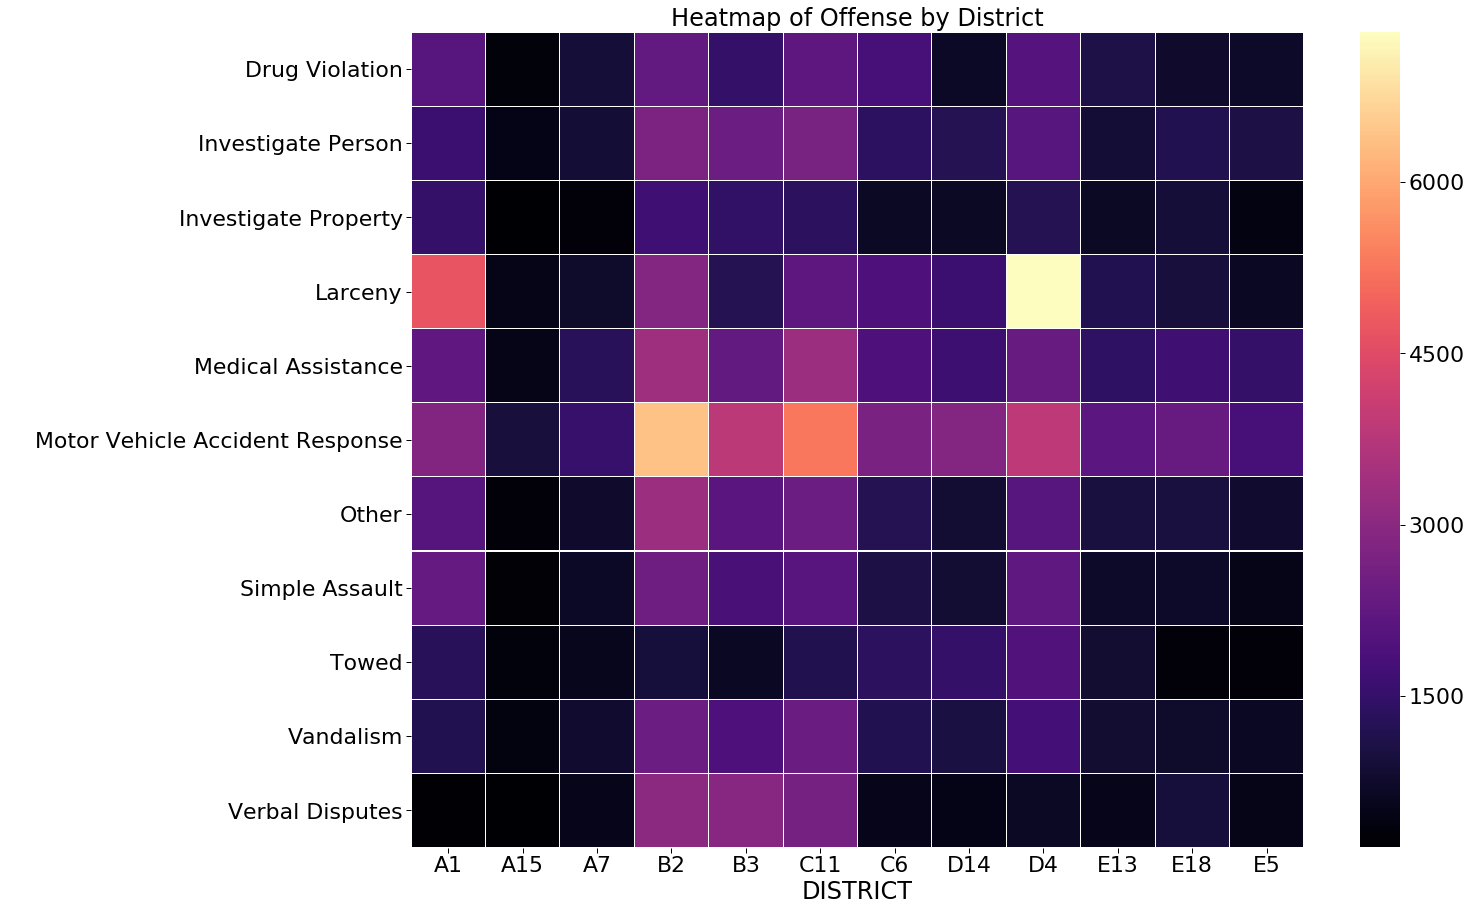

In [329]:
figure = plt.figure(figsize=(20,15))

sns.heatmap(offenseHeatDf,linecolor='white',linewidth=.1,cmap='magma')
plt.ylabel(' ')
plt.ylabel(' ')
plt.title('Heatmap of Offenses Commited by District')
plt.savefig('images/districtsOf')